# P2: Investigate a Dataset

Choose one of Udacity's curated datasets and investigate it using NumPy and Pandas. Go through the entire data analysis process, starting by posing a question and finishing by sharing your findings.

## Dataset

Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.
#### VARIABLE DESCRIPTIONS:
    survival        Survival
                (0 = No; 1 = Yes)
    pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
    name            Name
    sex             Sex
    age             Age
    sibsp           Number of Siblings/Spouses Aboard
    parch           Number of Parents/Children Aboard
    ticket          Ticket Number
    fare            Passenger Fare
    cabin           Cabin
    embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

    SPECIAL NOTES:
    Pclass is a proxy for socio-economic status (SES)
     1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

    Age is in Years; Fractional if Age less than One (1)
     If the Age is Estimated, it is in the form xx.5

    With respect to the family relation variables (i.e. sibsp and parch)
    some relations were ignored.  The following are the definitions used
    for sibsp and parch.

    Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
    Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
    Parent:   Mother or Father of Passenger Aboard Titanic
    Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

    Other family relatives excluded from this study include cousins,
    nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
    only with a nanny, therefore parch=0 for them.  As well, some
    travelled with very close friends or neighbors in a village, however,
    the definitions do not support such relations.
    
    Source : https://www.kaggle.com/c/titanic/data

## Questions posed 

* Does age of a passenger effect survival ? 
* Does the sex of a passenger effect surviaval ?
* Does the Class of a passenger have any effect on survival ?
* Does the number of relatives on board of a passenger have any effect on survival?

#### Here 'Survived' is the dependent variable 

## Preparing the Data


In [2]:
import pandas as pd
titanic_data=pd.read_csv('titanic_data.csv')
titanic_data.head()

#Loading and printing the first 5 items of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data=titanic_data.drop(['Name','PassengerId','Ticket'],axis=1)
#dropping columns that have no effect on survival

In [4]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now the first anomaly we find in the data is the count of age while for all other columns the count is 891 but in the case of Age it is 714 . That means some of the value of 'Age' is missing . So while finding the correlation between Survived and Age we will eliminate all the rows which don't have a value of 'Age'


In [5]:
import numpy as np
titanic_data_age_anomaly_deducted= titanic_data[np.isfinite(titanic_data['Age'])]
titanic_data_age_anomaly_deducted.describe()

#Only taking the rows which have proper values for 'Age' and we store the results in the variable
#titanic_data_age_anomaly_deducted

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## Does the Age of a passenger have any effect on whether a passenger survived or not ?


Lets Visualize the Data grouping them by whether survided or not 

Populating the interactive namespace from numpy and matplotlib


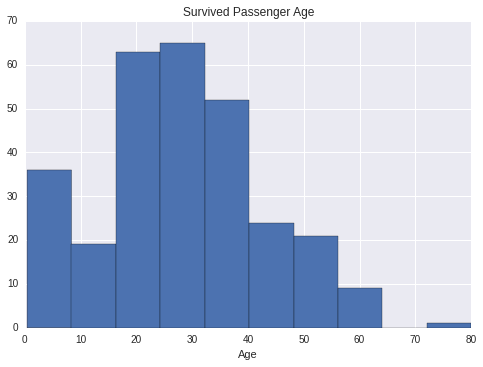

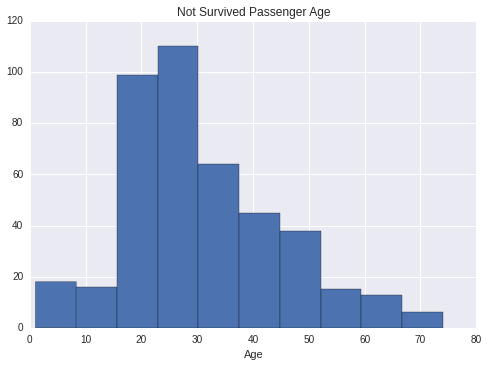

In [6]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

#Storing Age Data For Survived and not Survived 

survived_age_data=titanic_data_age_anomaly_deducted[titanic_data_age_anomaly_deducted['Survived']==1]['Age']
not_survived_age_data=titanic_data_age_anomaly_deducted[titanic_data_age_anomaly_deducted['Survived']==0]['Age']



#hist plot for Survived Passenger Age Data
plt.figure(1)
survived_age_data.hist()
plt.xlabel('Age')
plt.title('Survived Passenger Age ')

#hist plot for Not Survived Passenger Age Data
plt.figure(2)
not_survived_age_data.hist()
plt.xlabel('Age')
plt.title('Not Survived Passenger Age ')
plt.show()

In [7]:
print 'Survived Group of Passenger Statistics'
survived_age_data.describe()

Survived Group of Passenger Statistics


count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
print 'Non Survived Group of Passenger Statistics'
not_survived_age_data.describe()

Non Survived Group of Passenger Statistics


count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

#### In both the cases the mean and the Sd is don't show any significant effect of age on whether the passenger survived or not 


## Does the 'Sex' of a passenger have any effect on Survival ?

Our basic Intution is 'Female' are more likely to survive than 'Men'

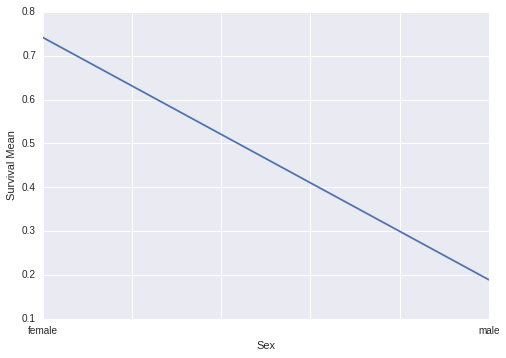

In [26]:
titanic_data.groupby('Sex').mean()['Survived'].plot().set_ylabel('Survival Mean')

This implies how the mean of Survivability changes drastically with the 'Sex' and 'Females' survived in more number than male 


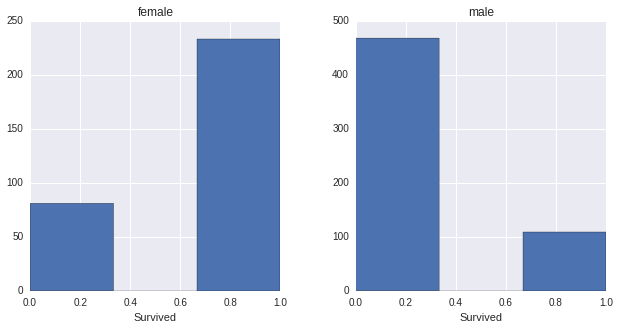

In [25]:
hists=titanic_data['Survived'].hist(by=titanic_data['Sex'],bins=3)
hists[0].set_xlabel('Survived')
hists[1].set_xlabel('Survived')

This shows the trend of Female and Male Survival

## Does the Class of a passenger have any effect on survival ?

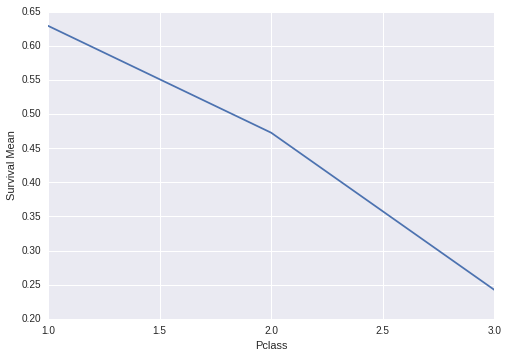

In [22]:
titanic_data.groupby('Pclass').mean()['Survived'].plot().set_ylabel('Survival Mean')

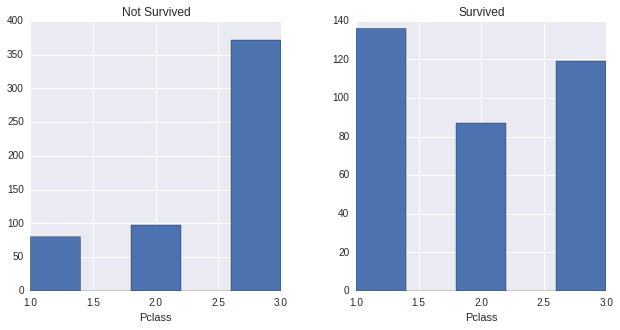

In [21]:
hists=titanic_data['Pclass'].hist(by=titanic_data['Survived'],bins=5)
hists[0].set_title('Not Survived')
hists[0].set_xlabel('Pclass')

hists[1].set_title('Survived')
hists[1].set_xlabel('Pclass')


This histogram shows that 'Pclass 1' is more likely to survive and 'Pclass 3' is more likely not to Survive .


## Does the number of relatives on board of a passenger have any effect on survival?

    sibsp           Number of Siblings/Spouses Aboard
    parch           Number of Parents/Children Aboard
    
 now lets add a new coulmn num_relatives in the titanic_data DataFrame.

In [13]:
titanic_data['num_relatives']=titanic_data['SibSp']+titanic_data['Parch']
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,num_relatives
0,0,3,male,22,1,0,7.2500,NaN,S,1
1,1,1,female,38,1,0,71.2833,C85,C,1
2,1,3,female,26,0,0,7.9250,NaN,S,0
3,1,1,female,35,1,0,53.1000,C123,S,1
4,0,3,male,35,0,0,8.0500,NaN,S,0


In [14]:
titanic_data[titanic_data['Survived']==1].describe()['num_relatives']

count    342.000000
mean       0.938596
std        1.186076
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: num_relatives, dtype: float64

In [15]:
titanic_data[titanic_data['Survived']==0].describe()['num_relatives']

count    549.000000
mean       0.883424
std        1.830669
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: num_relatives, dtype: float64

We can't find that the number of relatives on board had any significant effect on Survival

## Conclusion

As per my visualizantions and analysis 'Age' and 'Number of Relatives' was not a significant factor for Survival . On the other hand Survival dependent highly on 'Sex' and 'Pclass' the class of the passenger . These two factors contributed high in the survival .



In [16]:
condition=(titanic_data['Pclass']==1) * (titanic_data['Sex']=='female')
#condition for all pclass 1 and female passengers
titanic_data[condition].describe()['Survived']


count    94.000000
mean      0.968085
std       0.176716
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Survived, dtype: float64

Thats it most likely ones to survive are the female passengers from pclass 1 who have Survival Mean of 0.968085 . Thats why Rose survived :p 